<a href="https://colab.research.google.com/github/yuju1998/A-Search-520/blob/main/Data/Plots-and-Analysis/Voyage_to_the_Unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import github2pypi
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#!git clone https://github.com/PietropaoloV/A-Search-520.git
#%ls
#%pwd

In [3]:
path = "./A-Search-520/Data"
files = os.listdir(path)
files.sort()
del files[0]
print(files[31])

Q9prob=25-AStar-WeightedManhattan-NoBumps-Results.csv


# Question 4

In [4]:
q4 = pd.read_csv(path + "/" + files[0])

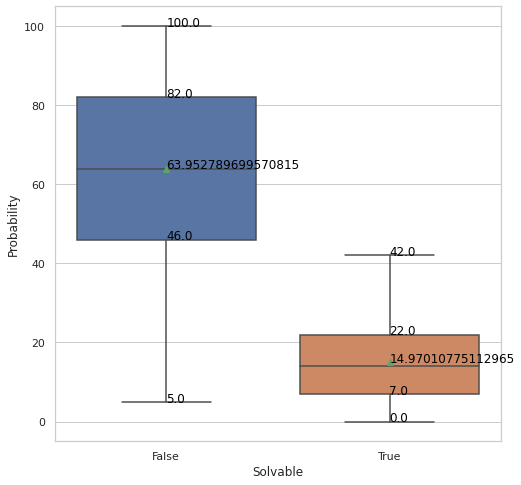

In [5]:
# Plot for Question 4
plt.figure(figsize = (8, 8))
q4_box = sns.boxplot(x=q4['Solvable'], y=q4['Probability'], showmeans=True)
q4_mean = q4.groupby(['Solvable'])['Probability'].mean()
q4_summary = q4.groupby(['Solvable'])['Probability'].quantile([0,0.25,0.5,0.75,1])

#print(q4_mean, q4_summary)

for xtick in q4_box.get_xticks():
   q4_box.text(xtick, q4_summary[xtick][0], str(q4_summary[xtick][0]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.25], str(q4_summary[xtick][0.25]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.75], str(q4_summary[xtick][0.75]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][1], str(q4_summary[xtick][1]), size='large', color='black')
   q4_box.text(xtick, q4_mean[xtick], str(q4_mean[xtick]), size='large', color='black')



# Question 5

In [6]:
q5_c = pd.read_csv(path + "/" + files[1])
q5_e = pd.read_csv(path + "/" + files[2])
q5_m = pd.read_csv(path + "/" + files[3])

> A star

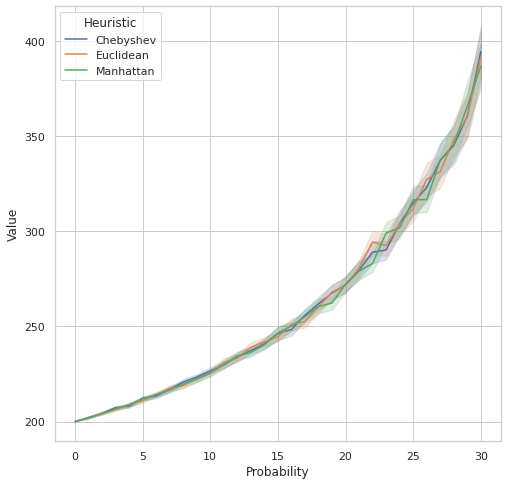

In [7]:
q5_astar = pd.concat([q5_c['Probability'], q5_c['Path Length (Repeated A*'].rename('Chebyshev'), q5_e['Path Length (Repeated A*'].rename('Euclidean'), q5_m['Path Length (Repeated A*'].rename('Manhattan')], axis=1)
q5_astar = q5_astar.melt('Probability', var_name='Heuristic', value_name='Value')
#print(q5_astar)
plt.figure(figsize=(8, 8))
q5_astar_line = sns.lineplot(x=q5_astar['Probability'], y=q5_astar['Value'], hue=q5_astar['Heuristic'])


> Number of Cells Processed

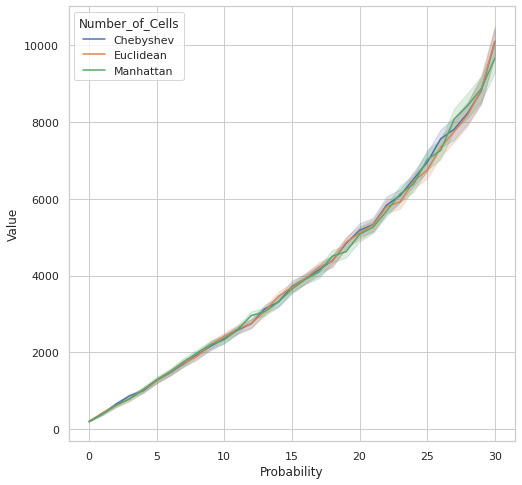

In [8]:
q5_cells = pd.concat([q5_c['Probability'], q5_c['Number of Cells Processed'].rename('Chebyshev'), q5_e['Number of Cells Processed'].rename('Euclidean'), q5_m['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])


> Runtime

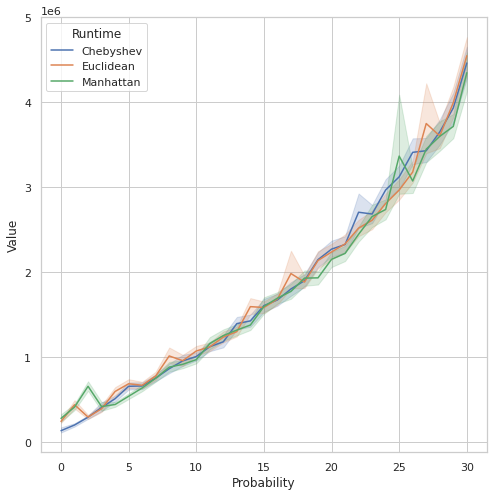

In [9]:
q5_time = pd.concat([q5_c['Probability'], q5_c['Runtime'].rename('Chebyshev'), q5_e['Runtime'].rename('Euclidean'), q5_m['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])

# Question 6

In [10]:
q6 = pd.read_csv(path + "/" + files[6])
q6_dt = pd.concat([q6['Probability'], q6['Path Length (Repeated A*'].rename('Trajectory'), q6['Path Length (Discovered)'].rename('Discovered'), q6['Path Length (Complete)'].rename('Full'), q6['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)

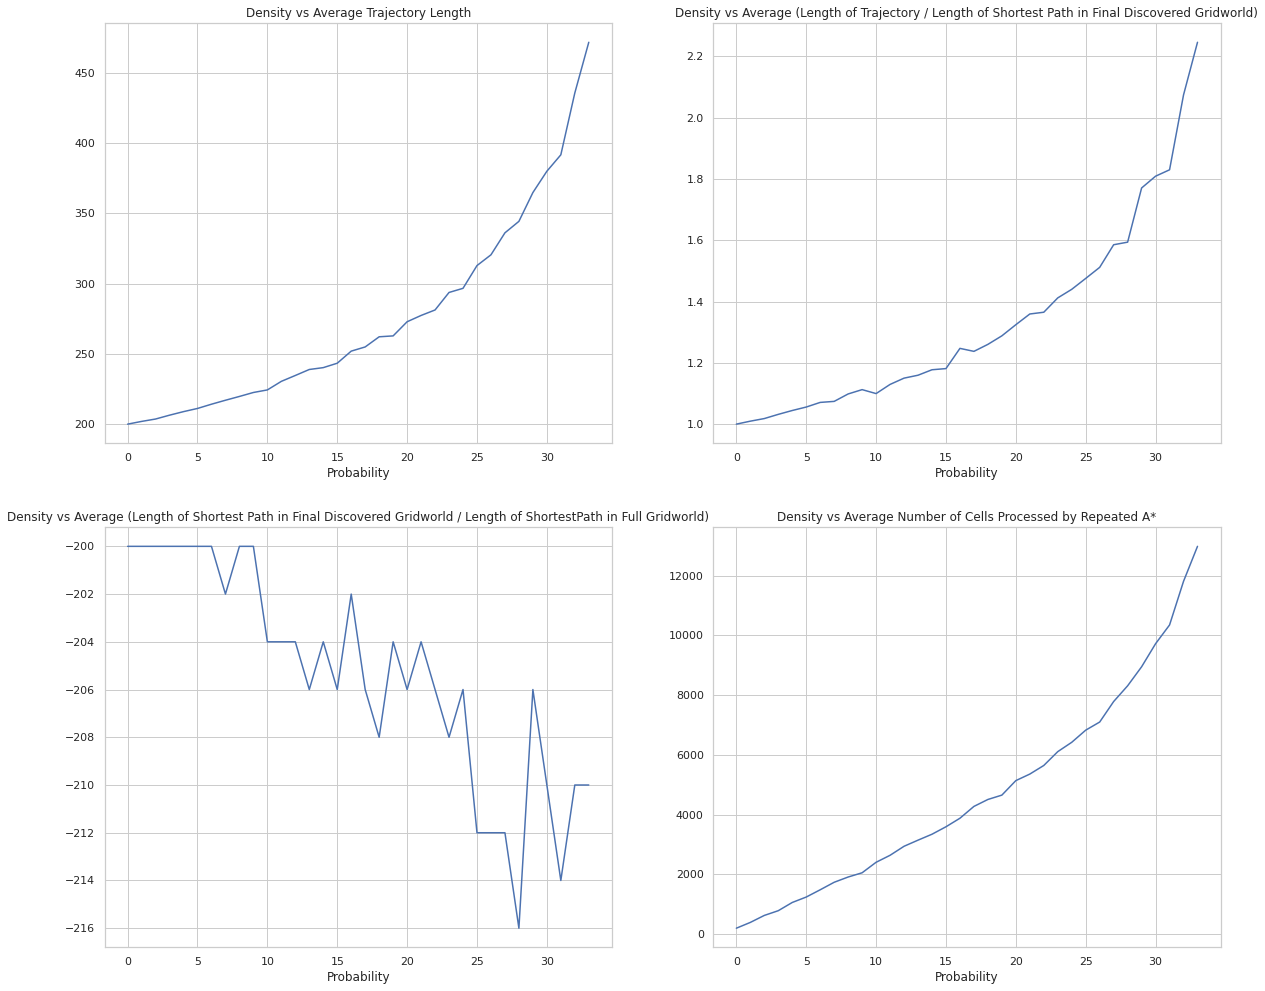

In [41]:
# Density vs Average Trajectory Length
q6_1_mean = q6_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(20, 17))
plt.subplot(2, 2, 1)
plt.title("Density vs Average Trajectory Length")
q6_1_line = sns.lineplot(data=q6_1_mean, x='Probability', y=q6_1_mean.values)

# Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)
q6_2 = pd.concat([q6['Probability'], q6['Path Length (Repeated A*'].rename('Trajectory')], axis=1)
q6_2_shortest = q6_dt.groupby(['Probability'])['Discovered'].quantile([0])
q6_2_mean = q6_2.groupby(['Probability'])['Trajectory'].mean()
#print(q6_2_mean, q6_2_shortest.values, q6_2_mean/q6_2_shortest.values)
plt.subplot(2, 2, 2)
plt.title("Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)")
q6_2_line = sns.lineplot(data=q6_2_mean, x='Probability', y=q6_2_mean.values/q6_2_shortest.values)

# Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)
q6_3_shortest_d = q6_dt.groupby(['Probability'])['Discovered'].quantile([0])
q6_3_shortest_f = q6_dt.groupby(['Probability'])['Full'].quantile([0])
#print(q6_3_shortest_d.values, '\n', q6_3_shortest_f.values, '\n', )
plt.subplot(2, 2, 3)
plt.title("Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)")
q6_3_line = sns.lineplot(data=q6_3_shortest_d, x='Probability', y=q6_3_shortest_d.values/q6_3_shortest_f.values)

# Density vs Average Number of Cells Processed by Repeated A*
q6_4_mean = q6_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.subplot(2, 2, 4)
plt.title("Density vs Average Number of Cells Processed by Repeated A*")
q6_4_line = sns.lineplot(data=q6_4_mean, x='Probability', y=q6_4_mean.values)


# Question 7

In [15]:
q7 = pd.read_csv(path + "/" + files[10])
q7_dt = pd.concat([q7['Probability'], q7['Path Length (Repeated A*'].rename('Trajectory'), q7['Path Length (Discovered)'].rename('Discovered'), q7['Path Length (Complete)'].rename('Full'), q7['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)

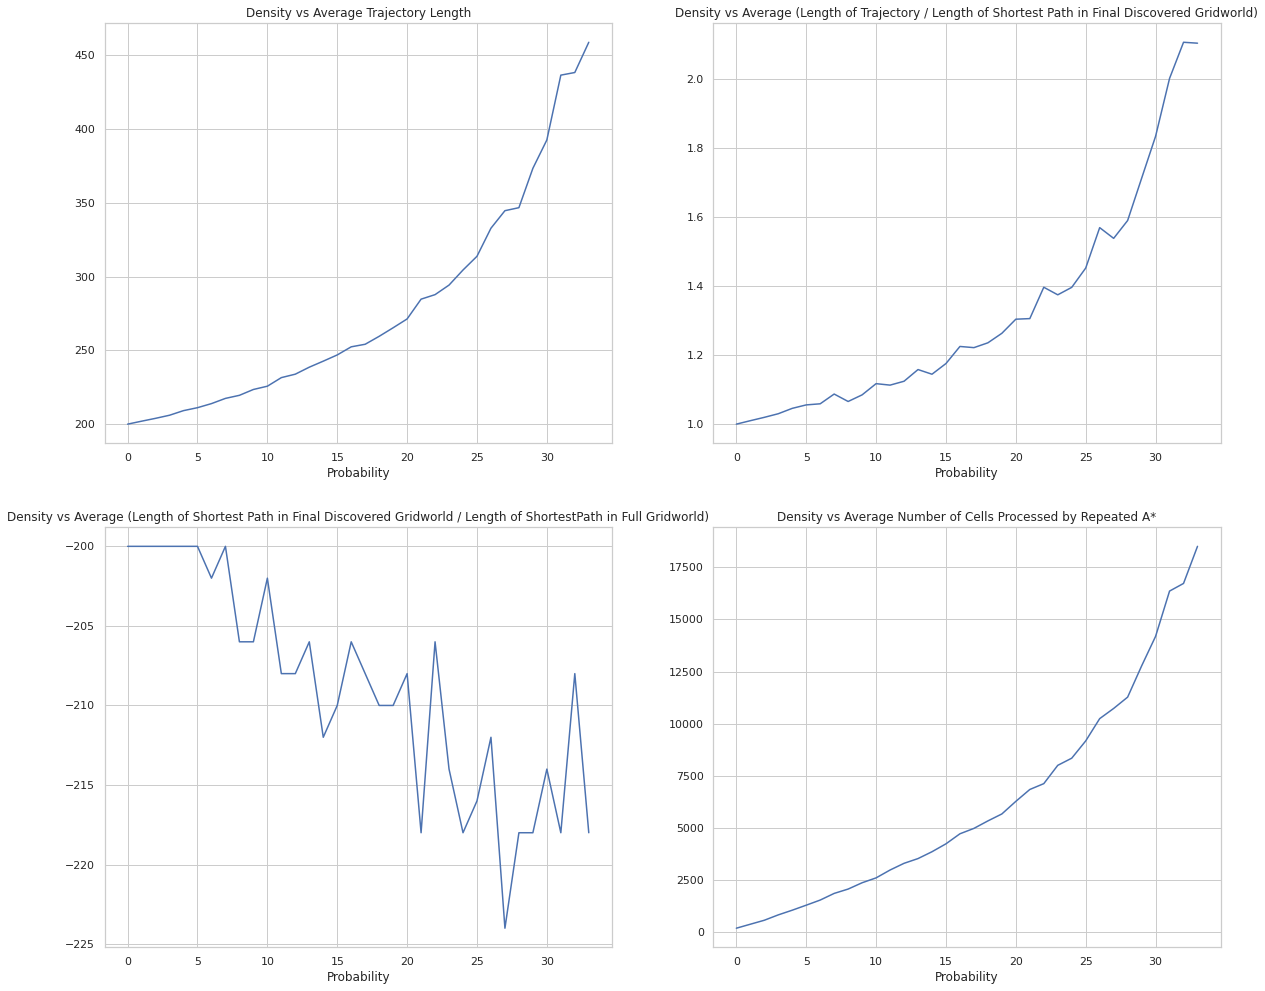

In [40]:
# Density vs Average Trajectory Length
q7_1_mean = q7_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(20, 17))
plt.subplot(2, 2, 1)
plt.title("Density vs Average Trajectory Length")
q7_1_line = sns.lineplot(data=q7_1_mean, x='Probability', y=q7_1_mean.values)

# Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)
q7_2 = pd.concat([q7['Probability'], q7['Path Length (Repeated A*'].rename('Trajectory')], axis=1)
q7_2_shortest = q7_dt.groupby(['Probability'])['Discovered'].quantile([0])
q7_2_mean = q7_2.groupby(['Probability'])['Trajectory'].mean()
#print(q7_2_mean, q7_2_shortest.values, q7_2_mean/q7_2_shortest.values)
plt.subplot(2, 2, 2)
plt.title("Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)")
q7_2_line = sns.lineplot(data=q7_2_mean, x='Probability', y=q7_2_mean.values/q7_2_shortest.values)

# Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)
q7_3_shortest_d = q7_dt.groupby(['Probability'])['Discovered'].quantile([0])
q7_3_shortest_f = q7_dt.groupby(['Probability'])['Full'].quantile([0])
#print(q7_3_shortest_d.values, '\n', q7_3_shortest_f.values, '\n', )
plt.subplot(2, 2, 3)
plt.title("Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)")
q7_3_line = sns.lineplot(data=q7_3_shortest_d, x='Probability', y=q7_3_shortest_d.values/q7_3_shortest_f.values)

# Density vs Average Number of Cells Processed by Repeated A*
q7_4_mean = q7_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.subplot(2, 2, 4)
plt.title("Density vs Average Number of Cells Processed by Repeated A*")
q7_4_line = sns.lineplot(data=q7_4_mean, x='Probability', y=q7_4_mean.values)

# Question 8

In [20]:
q8_dt_ls = []
for i in range(12,23):
  q8_dt_ls.append(pd.read_csv(path + "/" + files[i]))
q8_dist = ['1', '11', '16', '21', '26', '31', '36', '41', '46', '51', '16']
for i in range(len(q8_dt_ls)):
  q8_dt_ls[i] = pd.concat([
               q8_dt_ls[i]['Probability'],
               q8_dt_ls[i]['Path Length (Repeated A*'].rename('Trajectory'),
               q8_dt_ls[i]['Runtime'], 
               q8_dt_ls[i]['Number of Cells Processed'].rename("Number_of_Cells")
               ], axis=1)
  q8_dt_ls[i]['Dist'] = q8_dist[i]
q8_dt_ls.insert(1, q8_dt_ls[len(q8_dt_ls)-1])
del q8_dt_ls[len(q8_dt_ls)-1]
print(q8_dt_ls[10].head())

   Probability  Trajectory  Runtime  Number_of_Cells Dist
0          0.0       200.0   107800              201   51
1          0.0       200.0   103100              201   51
2          0.0       200.0   102300              201   51
3          0.0       200.0   101900              201   51
4          0.0       200.0   101200              201   51


In [21]:
q8_trty = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Trajectory'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Trajectory'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Trajectory'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Trajectory'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Trajectory'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Trajectory'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Trajectory'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Trajectory'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Trajectory'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Trajectory'].rename('Distance='+q8_dist[9]),
           q8_dt_ls[9]['Trajectory'].rename('Distance='+q8_dist[10])
           ], axis=1)
q8_trty = q8_trty.melt('Probability', var_name='Distance', value_name='Trajectory')
#print(q8_trty.head())



> Trajectory



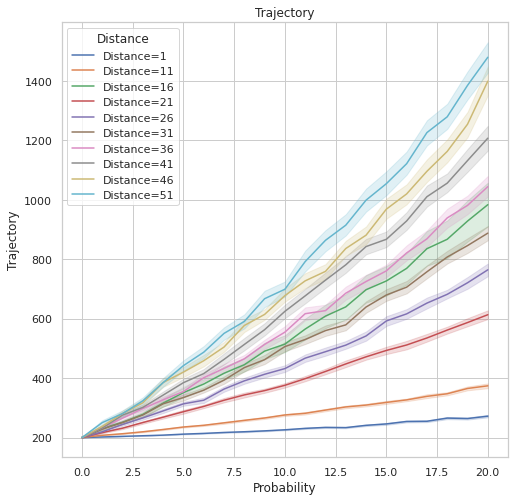

In [22]:
plt.figure(figsize=(8, 8))
plt.title("Trajectory")
q8_trty_line = sns.lineplot(x=q8_trty['Probability'], y=q8_trty['Trajectory'], hue=q8_trty['Distance'])


In [23]:
q8_rntm = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Runtime'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Runtime'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Runtime'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Runtime'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Runtime'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Runtime'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Runtime'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Runtime'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Runtime'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Runtime'].rename('Distance='+q8_dist[9]),
           q8_dt_ls[9]['Runtime'].rename('Distance='+q8_dist[10])
           ], axis=1)
q8_rntm = q8_rntm.melt('Probability', var_name='Distance', value_name='Runtime')
#print(q8_rntm.head())



> Runtime


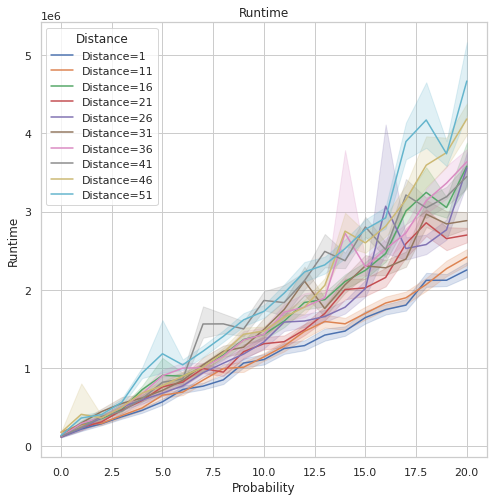

In [24]:
plt.figure(figsize=(8, 8))
plt.title("Runtime")
q8_rntm_line = sns.lineplot(x=q8_rntm['Probability'], y=q8_rntm['Runtime'], hue=q8_rntm['Distance'])


In [25]:
q8_cells = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Number_of_Cells'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Number_of_Cells'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Number_of_Cells'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Number_of_Cells'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Number_of_Cells'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Number_of_Cells'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Number_of_Cells'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Number_of_Cells'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Number_of_Cells'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Number_of_Cells'].rename('Distance='+q8_dist[9]),
           q8_dt_ls[9]['Number_of_Cells'].rename('Distance='+q8_dist[10])
           ], axis=1)
q8_cells = q8_cells.melt('Probability', var_name='Distance', value_name='Number_of_Cells')
print(q8_cells.head())

   Probability    Distance  Number_of_Cells
0          0.0  Distance=1              201
1          0.0  Distance=1              201
2          0.0  Distance=1              201
3          0.0  Distance=1              201
4          0.0  Distance=1              201




> Number of Cells Processed


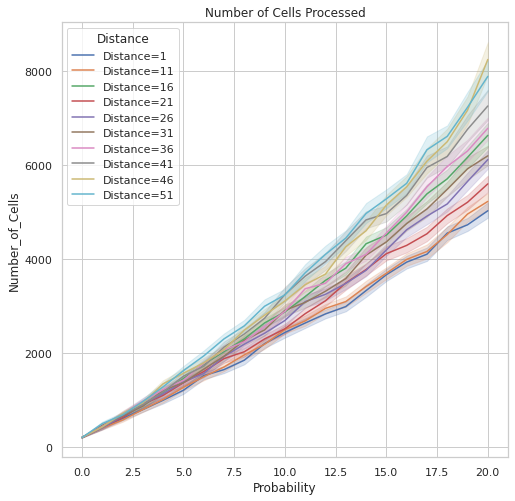

In [26]:
plt.figure(figsize=(8, 8))
plt.title("Number of Cells Processed")
q8_cells_line = sns.lineplot(x=q8_cells['Probability'], y=q8_cells['Number_of_Cells'], hue=q8_cells['Distance'])


# Question 9

In [27]:
q9_m_ls = []
for i in [26, 32]:
  q9_m_ls.append(pd.read_csv(path + "/" + files[i]))
for i in range(len(q9_m_ls)):
  q9_m_ls[i] = pd.concat([
               q9_m_ls[i]['Probability'],
               q9_m_ls[i]['Path Length (Repeated A*'].rename('Trajectory'),
               q9_m_ls[i]['Runtime'], 
               q9_m_ls[i]['Number of Cells Processed'].rename("Number_of_Cells"), 
               q9_m_ls[i]['Runtime Weight (EC)']
               ], axis=1)
#print(q9_m_ls[0].head())

In [28]:
q9_r_ls = []
for i in [28, 34]:
  #print(files[i])
  q9_r_ls.append(pd.read_csv(path + "/" + files[i]))
for i in range(len(q9_r_ls)):
  q9_r_ls[i] = pd.concat([
               q9_r_ls[i]['Probability'],
               q9_r_ls[i]['Path Length (Repeated A*'].rename('Trajectory'),
               q9_r_ls[i]['Runtime'], 
               q9_r_ls[i]['Number of Cells Processed'].rename("Number_of_Cells"), 
               q9_r_ls[i]['Runtime Weight (EC)']
               ], axis=1)
#print(q9_r_ls[0].head())



> Trajectory



In [29]:
q9_m_trty = pd.concat([
            pd.concat([q9_m_ls[0]['Probability'], q9_m_ls[0]['Trajectory']], axis=1),
            pd.concat([q9_m_ls[1]['Probability'], q9_m_ls[1]['Trajectory']], axis=1)
            ], axis=0)
#print(q9_m_trty.head())

In [30]:
q9_r_trty = pd.concat([
            pd.concat([q9_r_ls[0]['Probability'], q9_r_ls[0]['Trajectory']], axis=1),
            pd.concat([q9_r_ls[1]['Probability'], q9_r_ls[1]['Trajectory']], axis=1)
            ], axis=0)
#print(q9_r_trty.head())

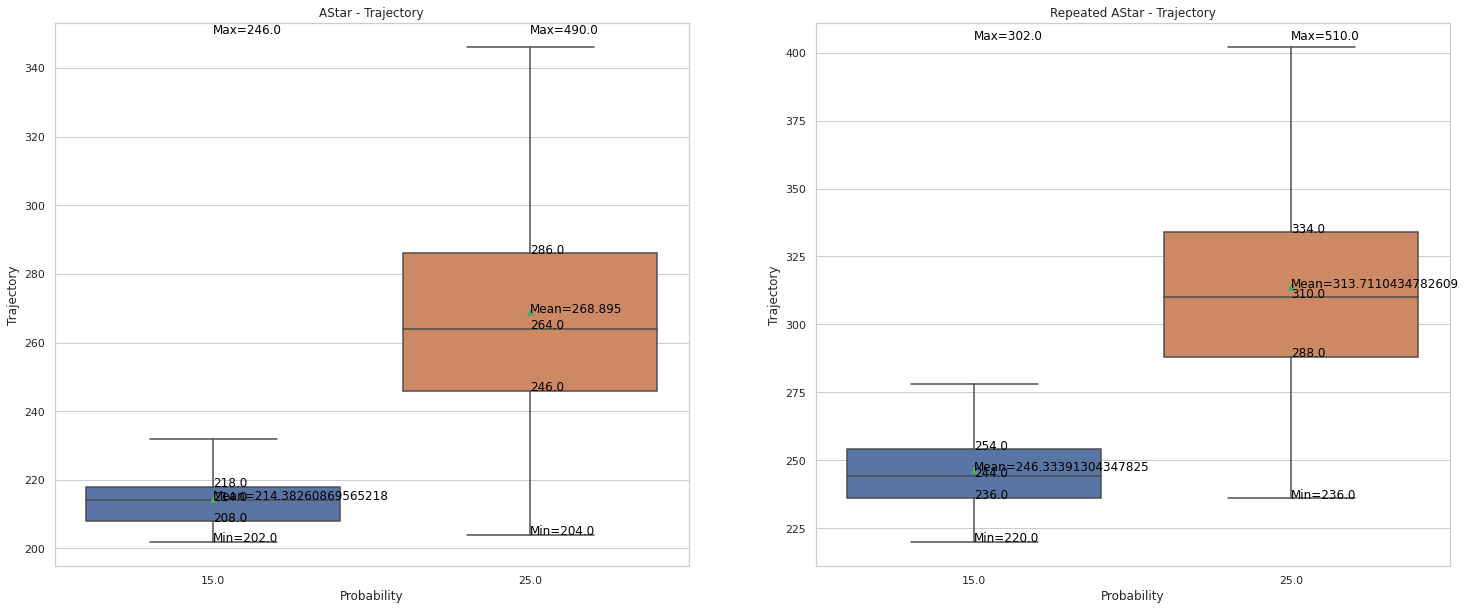

In [31]:
plt.figure(figsize = (25, 10))

plt.subplot(1, 2, 1)
plt.title("AStar - Trajectory")
q9_m_trty_box = sns.boxplot(x=q9_m_trty['Probability'], y=q9_m_trty['Trajectory'], showfliers=False, showmeans=True)
q9_m_trty_mean = q9_m_trty.groupby(['Probability'])['Trajectory'].mean()
q9_m_trty_summary = q9_m_trty.groupby(['Probability'])['Trajectory'].quantile([0,0.25,0.5,0.75,1])
#print(q9_m_trty_mean, q9_m_trty_summary)
prob = [15.0, 25.0]
for xtick in q9_m_trty_box.get_xticks():
  p = prob[xtick]
  q9_m_trty_box.text(xtick, q9_m_trty_summary[p][0], 'Min='+str(q9_m_trty_summary[p][0]), size='large', color='black')
  q9_m_trty_box.text(xtick, q9_m_trty_summary[p][0.25], str(q9_m_trty_summary[p][0.25]), size='large', color='black')
  q9_m_trty_box.text(xtick, q9_m_trty_summary[p][0.5], str(q9_m_trty_summary[p][0.5]), size='large', color='black')
  q9_m_trty_box.text(xtick, q9_m_trty_summary[p][0.75], str(q9_m_trty_summary[p][0.75]), size='large', color='black')
  q9_m_trty_box.text(xtick, 350, 'Max='+str(q9_m_trty_summary[p][1]), size='large', color='black')
  q9_m_trty_box.text(xtick, q9_m_trty_mean[p], 'Mean='+str(q9_m_trty_mean[p]), size='large', color='black')

plt.subplot(1, 2, 2)
plt.title("Repeated AStar - Trajectory")
q9_r_trty_box = sns.boxplot(x=q9_r_trty['Probability'], y=q9_r_trty['Trajectory'], showfliers=False, showmeans=True)
q9_r_trty_mean = q9_r_trty.groupby(['Probability'])['Trajectory'].mean()
q9_r_trty_summary = q9_r_trty.groupby(['Probability'])['Trajectory'].quantile([0,0.25,0.5,0.75,1])
#print(q9_r_trty_mean, q9_r_trty_summary)
for xtick in q9_r_trty_box.get_xticks():
  p = prob[xtick]
  q9_r_trty_box.text(xtick, q9_r_trty_summary[p][0], 'Min='+str(q9_r_trty_summary[p][0]), size='large', color='black')
  q9_r_trty_box.text(xtick, q9_r_trty_summary[p][0.25], str(q9_r_trty_summary[p][0.25]), size='large', color='black')
  q9_r_trty_box.text(xtick, q9_r_trty_summary[p][0.5], str(q9_r_trty_summary[p][0.5]), size='large', color='black')
  q9_r_trty_box.text(xtick, q9_r_trty_summary[p][0.75], str(q9_r_trty_summary[p][0.75]), size='large', color='black')
  q9_r_trty_box.text(xtick, 405, 'Max='+str(q9_r_trty_summary[p][1]), size='large', color='black')
  q9_r_trty_box.text(xtick, q9_r_trty_mean[p], 'Mean='+str(q9_r_trty_mean[p]), size='large', color='black')






> Runtime



In [32]:
q9_m_rntm = pd.concat([
            pd.concat([q9_m_ls[0]['Probability'], q9_m_ls[0]['Runtime']], axis=1),
            pd.concat([q9_m_ls[1]['Probability'], q9_m_ls[1]['Runtime']], axis=1)
            ], axis=0)
#print(q9_m_rntm.head())

In [33]:
q9_r_rntm = pd.concat([
            pd.concat([q9_r_ls[0]['Probability'], q9_r_ls[0]['Runtime']], axis=1),
            pd.concat([q9_r_ls[1]['Probability'], q9_r_ls[1]['Runtime']], axis=1)
            ], axis=0)
#print(q9_r_rntm.head())

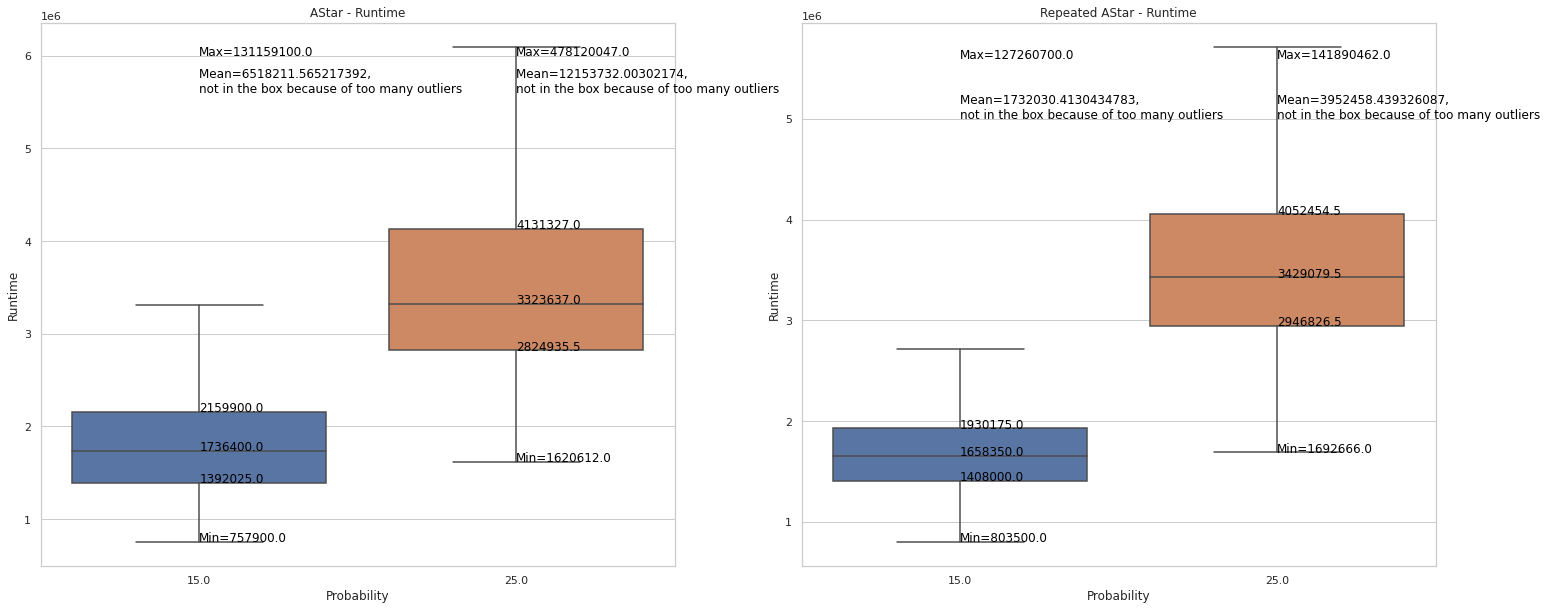

In [34]:
plt.figure(figsize = (25, 10))

plt.subplot(1, 2, 1)
plt.title("AStar - Runtime")

q9_m_rntm_box = sns.boxplot(x=q9_m_rntm['Probability'], y=q9_m_rntm['Runtime'], showfliers=False)
q9_m_rntm_mean = q9_m_rntm.groupby(['Probability'])['Runtime'].mean()
q9_m_rntm_summary = q9_m_rntm.groupby(['Probability'])['Runtime'].quantile([0,0.25,0.5,0.75,1])
#print(q9_m_rntm_mean, q9_m_rntm_summary)
prob = [15.0, 25.0]
for xtick in q9_m_rntm_box.get_xticks():
  p = prob[xtick]
  q9_m_rntm_box.text(xtick, q9_m_rntm_summary[p][0], 'Min='+str(q9_m_rntm_summary[p][0]), size='large', color='black')
  q9_m_rntm_box.text(xtick, q9_m_rntm_summary[p][0.25], str(q9_m_rntm_summary[p][0.25]), size='large', color='black')
  q9_m_rntm_box.text(xtick, q9_m_rntm_summary[p][0.75], str(q9_m_rntm_summary[p][0.75]), size='large', color='black')
  q9_m_rntm_box.text(xtick, q9_m_rntm_summary[p][0.5], str(q9_m_rntm_summary[p][0.5]), size='large', color='black')
  q9_m_rntm_box.text(xtick, 6*1e06, 'Max='+str(q9_m_rntm_summary[p][1]), size='large', color='black')
  q9_m_rntm_box.text(xtick, 5.6*1e06, 'Mean='+str(q9_m_rntm_mean[p])+', \n'+'not in the box because of too many outliers', size='large', color='black')

plt.subplot(1, 2, 2)
plt.title("Repeated AStar - Runtime")
q9_r_rntm_box = sns.boxplot(x=q9_r_rntm['Probability'], y=q9_r_rntm['Runtime'], showfliers=False)
q9_r_rntm_mean = q9_r_rntm.groupby(['Probability'])['Runtime'].mean()
q9_r_rntm_summary = q9_r_rntm.groupby(['Probability'])['Runtime'].quantile([0,0.25,0.5,0.75,1])
#print(q9_r_rntm_mean, q9_r_rntm_summary)
for xtick in q9_r_rntm_box.get_xticks():
  p = prob[xtick]
  q9_r_rntm_box.text(xtick, q9_r_rntm_summary[p][0], 'Min='+str(q9_r_rntm_summary[p][0]), size='large', color='black')
  q9_r_rntm_box.text(xtick, q9_r_rntm_summary[p][0.25], str(q9_r_rntm_summary[p][0.25]), size='large', color='black')
  q9_r_rntm_box.text(xtick, q9_r_rntm_summary[p][0.75], str(q9_r_rntm_summary[p][0.75]), size='large', color='black')
  q9_r_rntm_box.text(xtick, q9_r_rntm_summary[p][0.5], str(q9_r_rntm_summary[p][0.5]), size='large', color='black')
  q9_r_rntm_box.text(xtick, 5.6*1e06, 'Max='+str(q9_r_rntm_summary[p][1]), size='large', color='black')
  q9_r_rntm_box.text(xtick, 5*1e06, 'Mean='+str(q9_r_rntm_mean[p])+', \n'+'not in the box because of too many outliers', size='large', color='black')






> Number of Cells Processed



In [35]:
q9_m_cells = pd.concat([
            pd.concat([q9_m_ls[0]['Probability'], q9_m_ls[0]['Number_of_Cells']], axis=1),
            pd.concat([q9_m_ls[1]['Probability'], q9_m_ls[1]['Number_of_Cells']], axis=1)
            ], axis=0)
#print(q9_m_rntm.head())

In [36]:
q9_r_cells = pd.concat([
            pd.concat([q9_r_ls[0]['Probability'], q9_r_ls[0]['Number_of_Cells']], axis=1),
            pd.concat([q9_r_ls[1]['Probability'], q9_r_ls[1]['Number_of_Cells']], axis=1)
            ], axis=0)
#print(q9_r_rntm.head())

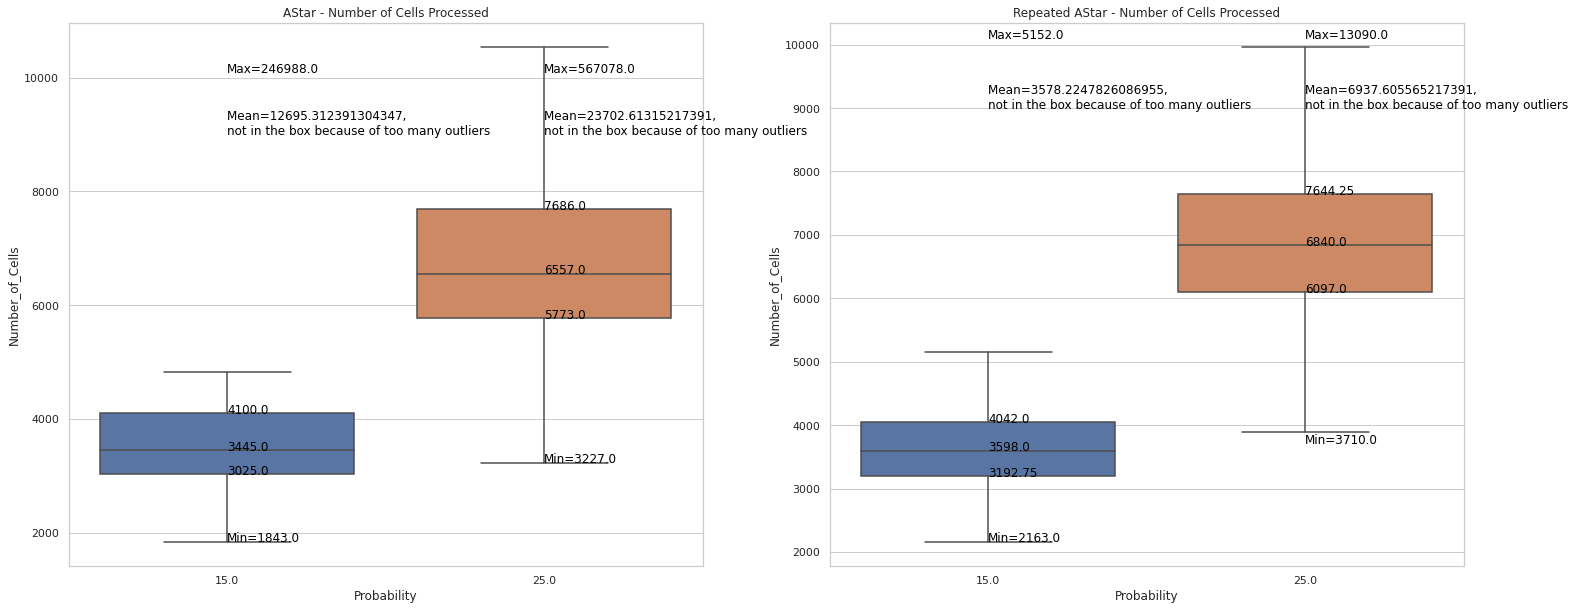

In [37]:
plt.figure(figsize = (25, 10))
plt.subplot(1, 2, 1)
plt.title("AStar - Number of Cells Processed")

q9_m_cells_box = sns.boxplot(x=q9_m_cells['Probability'], y=q9_m_cells['Number_of_Cells'], showfliers=False)
q9_m_cells_mean = q9_m_cells.groupby(['Probability'])['Number_of_Cells'].mean()
q9_m_cells_summary = q9_m_cells.groupby(['Probability'])['Number_of_Cells'].quantile([0,0.25,0.5,0.75,1])
#print(q9_m_cells_mean, q9_m_cells_summary)
prob = [15.0, 25.0]
for xtick in q9_m_cells_box.get_xticks():
  p = prob[xtick]
  q9_m_cells_box.text(xtick, q9_m_cells_summary[p][0], 'Min='+str(q9_m_cells_summary[p][0]), size='large', color='black')
  q9_m_cells_box.text(xtick, q9_m_cells_summary[p][0.25], str(q9_m_cells_summary[p][0.25]), size='large', color='black')
  q9_m_cells_box.text(xtick, q9_m_cells_summary[p][0.75], str(q9_m_cells_summary[p][0.75]), size='large', color='black')
  q9_m_cells_box.text(xtick, q9_m_cells_summary[p][0.5], str(q9_m_cells_summary[p][0.5]), size='large', color='black')
  q9_m_cells_box.text(xtick, 10100, 'Max='+str(q9_m_cells_summary[p][1]), size='large', color='black')
  q9_m_cells_box.text(xtick, 9000, 'Mean='+str(q9_m_cells_mean[p])+', \n'+'not in the box because of too many outliers', size='large', color='black')

plt.subplot(1, 2, 2)
plt.title("Repeated AStar - Number of Cells Processed")
q9_r_cells_box = sns.boxplot(x=q9_r_cells['Probability'], y=q9_r_cells['Number_of_Cells'], showfliers=False)
q9_r_cells_mean = q9_r_cells.groupby(['Probability'])['Number_of_Cells'].mean()
q9_r_cells_summary = q9_r_cells.groupby(['Probability'])['Number_of_Cells'].quantile([0,0.25,0.5,0.75,1])
#print(q9_r_cells_mean, q9_r_cells_summary)
prob = [15.0, 25.0]
for xtick in q9_r_cells_box.get_xticks():
  p = prob[xtick]
  q9_r_cells_box.text(xtick, q9_r_cells_summary[p][0], 'Min='+str(q9_r_cells_summary[p][0]), size='large', color='black')
  q9_r_cells_box.text(xtick, q9_r_cells_summary[p][0.25], str(q9_r_cells_summary[p][0.25]), size='large', color='black')
  q9_r_cells_box.text(xtick, q9_r_cells_summary[p][0.75], str(q9_r_cells_summary[p][0.75]), size='large', color='black')
  q9_r_cells_box.text(xtick, q9_r_cells_summary[p][0.5], str(q9_r_cells_summary[p][0.5]), size='large', color='black')
  q9_r_cells_box.text(xtick, 10100, 'Max='+str(q9_r_cells_summary[p][1]), size='large', color='black')
  q9_r_cells_box.text(xtick, 9000, 'Mean='+str(q9_r_cells_mean[p])+', \n'+'not in the box because of too many outliers', size='large', color='black')

